In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Reading the csv file
df = pd.read_csv("../data/customer_behavior.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


# Dealing with duplicates

In [6]:
df = df.drop_duplicates(keep='first')
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# One Hot Encoding

In [8]:
# Applying simple one hot encoding on month column
df = pd.get_dummies(df, columns=['Month'], prefix='Month')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [9]:
# Dealing with the remaining categorical column:
df['VisitorType'].value_counts(dropna=False)

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

In [10]:
# Calculating the percentage of each value in the "VisitorType" column, do determine if i will drop the other category
df['VisitorType'].value_counts()/len(df)*100
# The other category is 0.6% of the dataframe, and therefore i will drop all the rows with other value

VisitorType
Returning_Visitor    85.464973
New_Visitor          13.871364
Other                 0.663662
Name: count, dtype: float64

In [11]:
df = df[~(df['VisitorType'] == 'Other')]
df['VisitorType'].value_counts(dropna=False)

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Name: count, dtype: int64

In [12]:
# Applying simple one hot encoding on VisitorType column
df = pd.get_dummies(df, columns=['VisitorType'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12124 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12124 non-null  int64  
 1   Administrative_Duration        12124 non-null  float64
 2   Informational                  12124 non-null  int64  
 3   Informational_Duration         12124 non-null  float64
 4   ProductRelated                 12124 non-null  int64  
 5   ProductRelated_Duration        12124 non-null  float64
 6   BounceRates                    12124 non-null  float64
 7   ExitRates                      12124 non-null  float64
 8   PageValues                     12124 non-null  float64
 9   SpecialDay                     12124 non-null  float64
 10  OperatingSystems               12124 non-null  int64  
 11  Browser                        12124 non-null  int64  
 12  Region                         12124 non-null  int6

# Type casting

In [14]:
# Converting the boolean generated columns to int, as well as Revenue and Weekend
for col in df.columns:
    if df[col].dtype== bool:
        df[col]=df[col].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12124 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12124 non-null  int64  
 1   Administrative_Duration        12124 non-null  float64
 2   Informational                  12124 non-null  int64  
 3   Informational_Duration         12124 non-null  float64
 4   ProductRelated                 12124 non-null  int64  
 5   ProductRelated_Duration        12124 non-null  float64
 6   BounceRates                    12124 non-null  float64
 7   ExitRates                      12124 non-null  float64
 8   PageValues                     12124 non-null  float64
 9   SpecialDay                     12124 non-null  float64
 10  OperatingSystems               12124 non-null  int64  
 11  Browser                        12124 non-null  int64  
 12  Region                         12124 non-null  int6

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
count,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,...,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000
mean,2.344193,81.752255,0.510887,34.976196,32.172633,1211.047219,0.020302,0.041364,5.861782,0.062356,...,0.014929,0.035632,0.023425,0.153415,0.274579,0.244144,0.045282,0.036952,0.139640,0.860360
std,3.334480,177.272187,1.278299,141.797257,44.662864,1922.508742,0.045027,0.045990,18.156144,0.200268,...,0.121274,0.185378,0.151254,0.360402,0.446320,0.429596,0.207931,0.188651,0.346628,0.346628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,195.625000,0.000000,0.014264,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,9.333333,0.000000,0.000000,18.000000,613.944583,0.002995,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,95.000000,0.000000,0.000000,38.000000,1483.341666,0.016667,0.048238,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


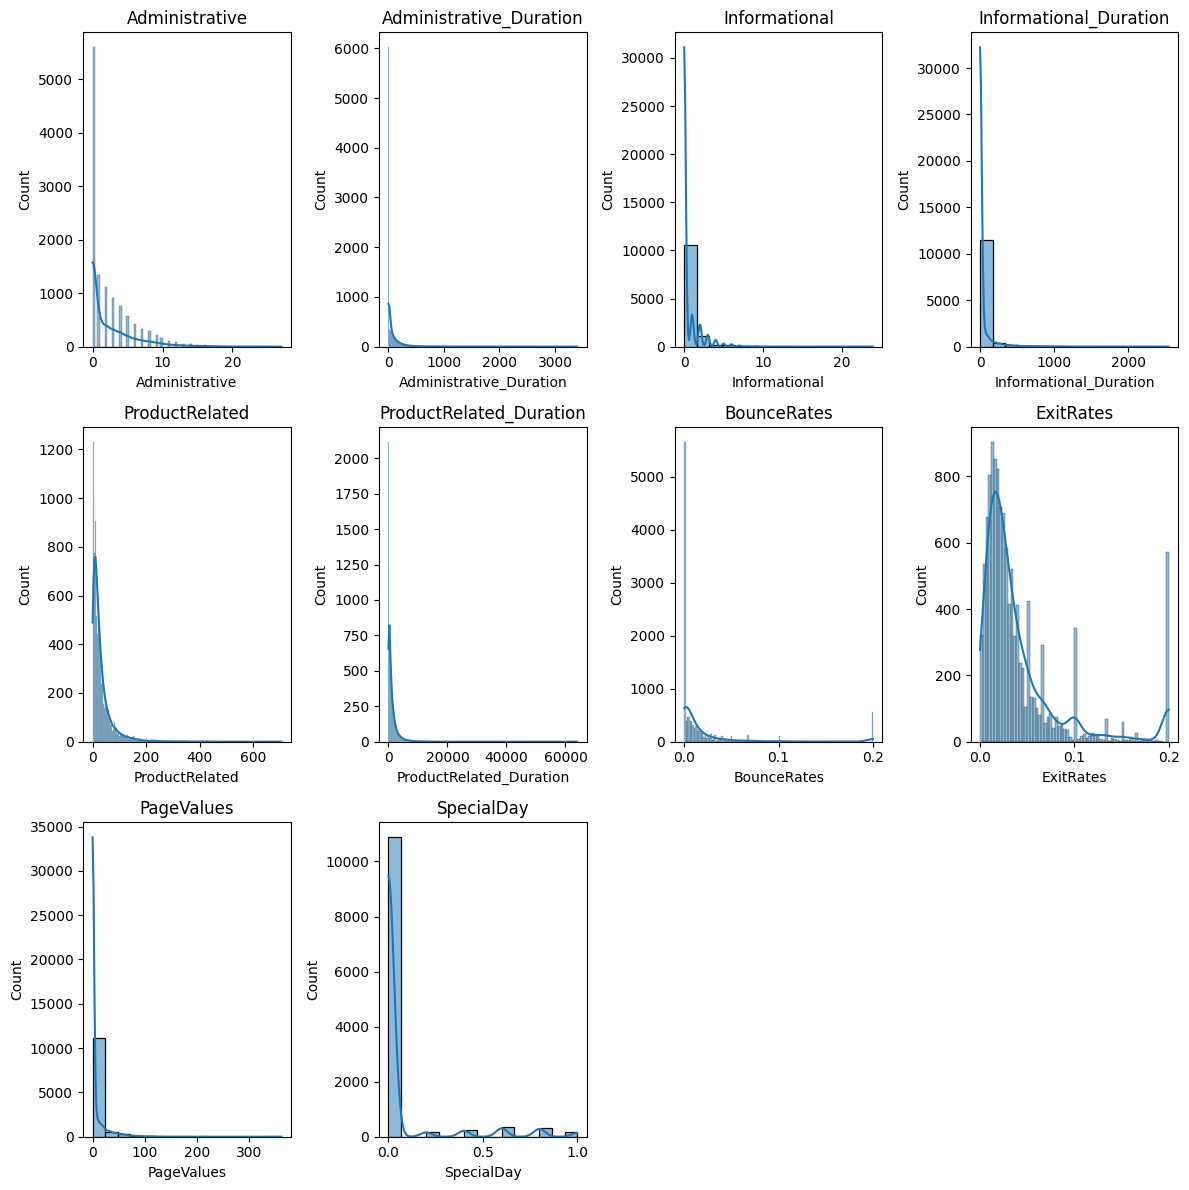

In [17]:
plt.figure(figsize=(12, 12))
columns_to_plot = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay' ]
for index, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 4, index)  # 3 rows, 4 columns
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Scaling the Data

In [18]:
# Creating a directory to store the scalers
scalers_folder = '../scalers'
os.makedirs(scalers_folder, exist_ok=True)

In [19]:
# As the columns are skewed, i will apply a minmax scaler 

# Creating and fitting the scaler
scaler1 = MinMaxScaler()
scaler1.fit(df)

# Saving the scaler
scaler1_path = os.path.join(scalers_folder, 'scaler1.pkl')
with open(scaler1_path, 'wb') as file:
    pickle.dump(scaler1, file)

In [20]:
# Loading the scaler
with open(scaler1_path, 'rb') as file:
    loaded_scaler1 = pickle.load(file)

In [21]:
# Applying the loaded scaler to the dataframe to transform the features
data_arr = loaded_scaler1.transform(df)

# Converting the scaled array back to a DataFrame
scaled_df = pd.DataFrame(data_arr, columns=df.columns)
scaled_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12120,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12121,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12122,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Checking for Multiccollinearity

In [29]:
correlation_matrix = (scaled_df.drop("Revenue",axis=1)).corr()
correlation_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
Administrative,1.000000,0.601661,0.375975,0.255041,0.429131,0.372050,-0.212888,-0.310691,0.101511,-0.097684,...,-0.066151,0.004578,-0.001758,-0.052180,-0.066169,0.051261,0.089828,0.058196,0.025284,-0.025284
Administrative_Duration,0.601661,1.000000,0.302720,0.237597,0.288291,0.355465,-0.136881,-0.201626,0.069943,-0.075218,...,-0.044864,-0.003121,-0.019037,-0.020943,-0.040087,0.032139,0.054287,0.030469,0.023212,-0.023212
Informational,0.375975,0.302720,1.000000,0.618662,0.371783,0.385506,-0.109412,-0.159676,0.051116,-0.049953,...,-0.040690,0.000799,0.005507,-0.026544,-0.039723,0.063504,-0.003872,0.008593,-0.055836,0.055836
Informational_Duration,0.255041,0.237597,0.618662,1.000000,0.278771,0.346578,-0.070036,-0.102922,0.032419,-0.031624,...,-0.028261,0.014294,-0.016419,-0.010590,-0.032662,0.036377,0.005669,0.001051,-0.044686,0.044686
ProductRelated,0.429131,0.288291,0.371783,0.278771,1.000000,0.860112,-0.193491,-0.286392,0.055801,-0.026778,...,-0.057387,0.018226,0.012516,-0.113340,-0.074629,0.182912,0.006797,0.004089,-0.127260,0.127260
ProductRelated_Duration,0.372050,0.355465,0.385506,0.346578,0.860112,1.000000,-0.174224,-0.245274,0.052648,-0.038861,...,-0.046890,0.000656,-0.001167,-0.083756,-0.070032,0.167393,-0.010657,0.004314,-0.120348,0.120348
BounceRates,-0.212888,-0.136881,-0.109412,-0.070036,-0.193491,-0.174224,1.000000,0.902010,-0.117046,0.089873,...,0.066123,0.018675,0.044694,-0.029111,0.064826,-0.029702,-0.040885,-0.035322,-0.135611,0.135611
ExitRates,-0.310691,-0.201626,-0.159676,-0.102922,-0.286392,-0.245274,0.902010,1.000000,-0.174772,0.118729,...,0.082175,0.016576,0.051703,-0.006403,0.078875,-0.054448,-0.058499,-0.047040,-0.182124,0.182124
PageValues,0.101511,0.069943,0.051116,0.032419,0.055801,0.052648,-0.117046,-0.174772,1.000000,-0.064985,...,-0.033610,-0.018606,-0.020666,-0.042253,-0.012643,0.041084,0.033393,0.018288,0.109104,-0.109104
SpecialDay,-0.097684,-0.075218,-0.049953,-0.031624,-0.026778,-0.038861,0.089873,0.118729,-0.064985,1.000000,...,0.107710,-0.059852,-0.048224,-0.132550,0.466426,-0.176964,-0.067812,-0.060992,-0.084805,0.084805


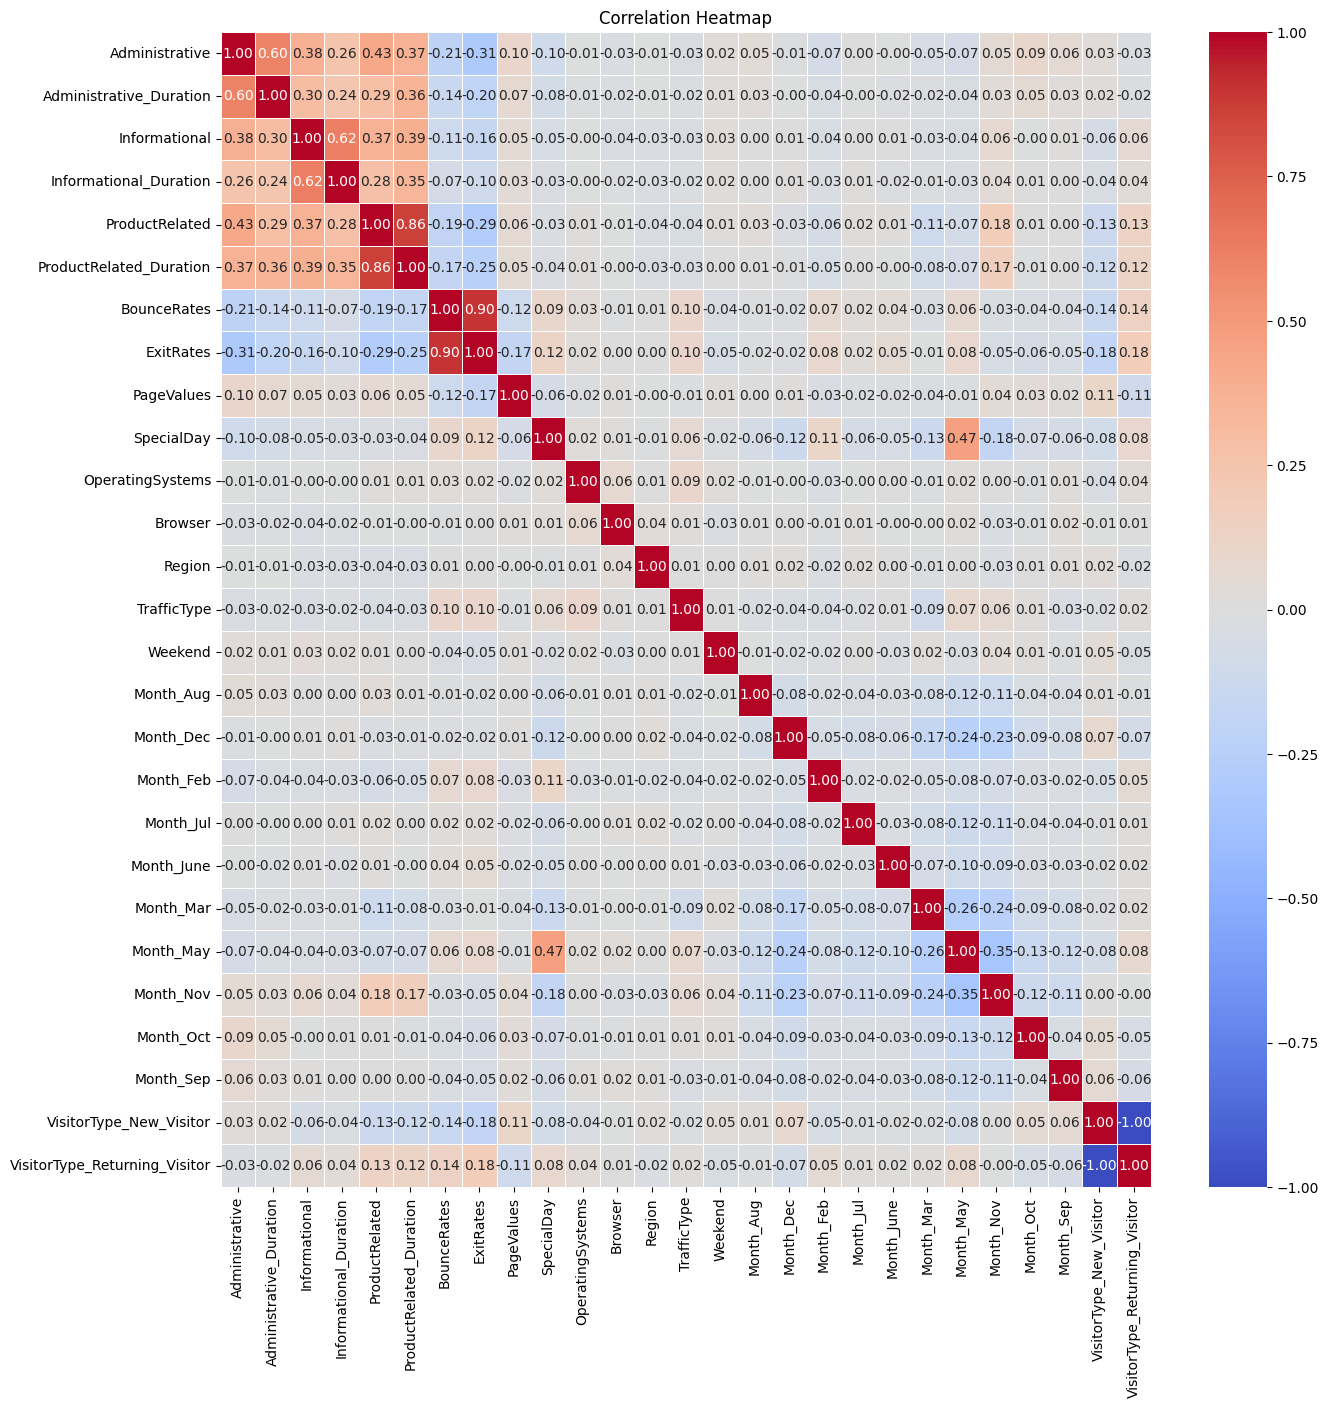

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given columns
def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [35]:
# Columns to consider
selected_columns = list(df.columns)
selected_columns.remove("Revenue")

# compute vif
vif_df = compute_vif(df, selected_columns)
display(vif_df)

D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,VisitorType_Returning_Visitor,inf
1,Month_Dec,inf
2,VisitorType_New_Visitor,inf
3,Month_Sep,inf
4,Month_Oct,inf
5,Month_Nov,inf
6,Month_May,inf
7,Month_Mar,inf
8,Month_June,inf
9,Month_Jul,inf


In [37]:
# Only considering the columns that were originally numerical
selected_columns_new=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay', 'OperatingSystems', 'Weekend', 'Region', 'TrafficType']

# compute vif
vif_df = compute_vif(df, selected_columns_new)
display(vif_df)

,Variable,VIF
0,ExitRates,6.194055
1,BounceRates,5.653064
2,ProductRelated,4.368752
3,ProductRelated_Duration,4.308999
4,Administrative,1.938273
5,Informational,1.826696
6,Administrative_Duration,1.692359
7,Informational_Duration,1.677476
8,PageValues,1.045013
9,SpecialDay,1.026966


In [ ]:
# I am setting my VIF threshold to 10, and therefore i will not drop any columns

# Train-Test Split

In [38]:
# Specifying the features and target variable
X = scaled_df.drop(columns='Revenue', axis=1)
y = scaled_df['Revenue']

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [41]:
# Confirming that the column drop was performed correctly
display(X.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [48]:
y_train.value_counts()

Revenue
0.0    8201
1.0    1498
Name: count, dtype: int64

In [49]:
# As there is obvious class imbalance, we will perform SMOTE

# SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE on the train set
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [47]:
# Convert the resampled target variable to a pandas Series
y_train_resampled = pd.Series(y_train_resampled)
y_train_resampled.value_counts()

Revenue
0.0    8201
1.0    8201
Name: count, dtype: int64

# Logistic Regression

In [57]:
# Creating the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [58]:
# Creating a directory to store the models
models_folder = '../models'
os.makedirs(models_folder, exist_ok=True)

In [60]:
# Saving the model
logreg_path = os.path.join(models_folder, 'lr.pkl')
with open(logreg_path, 'wb') as file:
    pickle.dump(logreg, file)

In [61]:
# Loading the model
with open(logreg_path, 'rb') as file:
    loaded_lr = pickle.load(file)

In [62]:
# Using the loaded model to predict y
y_pred = loaded_lr.predict(X_test)

# Calculating the accuracy of the logistic regression model

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      2031
         1.0       0.50      0.78      0.61       394

    accuracy                           0.84      2425
   macro avg       0.73      0.82      0.75      2425
weighted avg       0.88      0.84      0.85      2425

Kappa score: 0.515


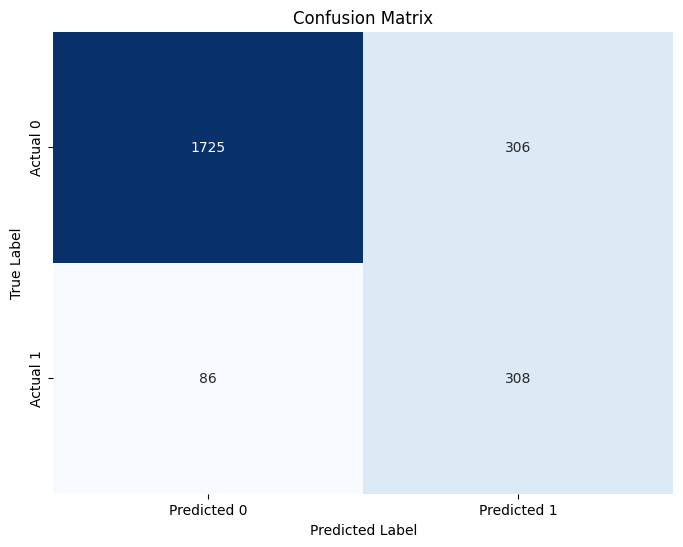

In [66]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Random Forest classifier using Gridsearch

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,5,10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Creating the Random Forest Classifier
rf = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=20)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 1/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 2/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 3/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=

D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", l

In [69]:
display(best_params)

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [75]:
rf_model1 = grid_search.best_estimator_

# Saving the best model to a pickle file
rf_model1_path = os.path.join(models_folder, 'rf_model1.pkl')
with open(rf_model1_path, 'wb') as file:
    pickle.dump(rf_model1, file)

In [76]:
# Loading the best model from the pickle file
with open(rf_model1_path, 'rb') as file:
    loaded_rf_model1 = pickle.load(file)

In [79]:
# Predicting y using the loaded model
y_pred2 = loaded_rf_model1.predict(X_test)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      2031
         1.0       0.78      0.58      0.67       394

    accuracy                           0.91      2425
   macro avg       0.85      0.78      0.81      2425
weighted avg       0.90      0.91      0.90      2425

Kappa score: 0.616


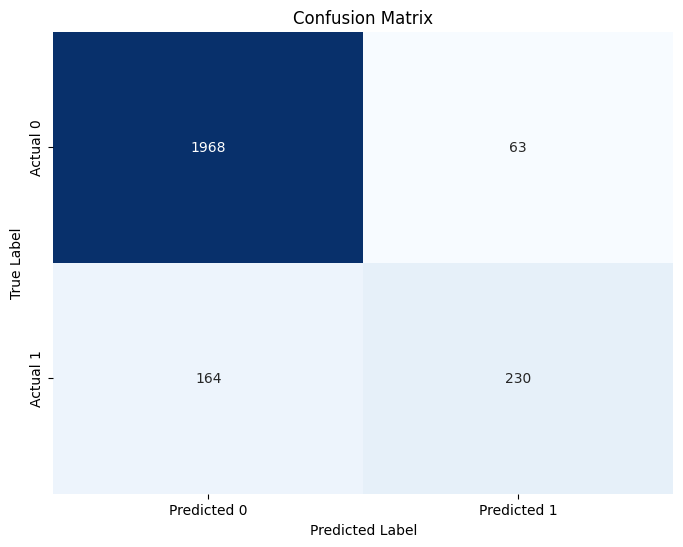

In [80]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred2)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [73]:
# Creating another random forest classifier, with the resampled data, and this time focusing on the precision
rf2 = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, scoring='precision', verbose=20)
grid_search2.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params2 = grid_search2.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 1/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.1s
[CV 2/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 2/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 3/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=

D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", l

In [81]:
display(best_params2)

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [82]:
rf_model2 = grid_search2.best_estimator_

# Saving the best model to a pickle file
rf_model2_path = os.path.join(models_folder, 'rf_model2.pkl')
with open(rf_model2_path, 'wb') as file:
    pickle.dump(rf_model2, file)

In [83]:
# Loading the best model from the pickle file
with open(rf_model2_path, 'rb') as file:
    loaded_rf_model2 = pickle.load(file)

In [84]:
# Predicting y using the loaded model
y_pred3 = loaded_rf_model2.predict(X_test)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2031
         1.0       0.62      0.79      0.70       394

    accuracy                           0.89      2425
   macro avg       0.79      0.85      0.81      2425
weighted avg       0.90      0.89      0.89      2425

Kappa score: 0.628


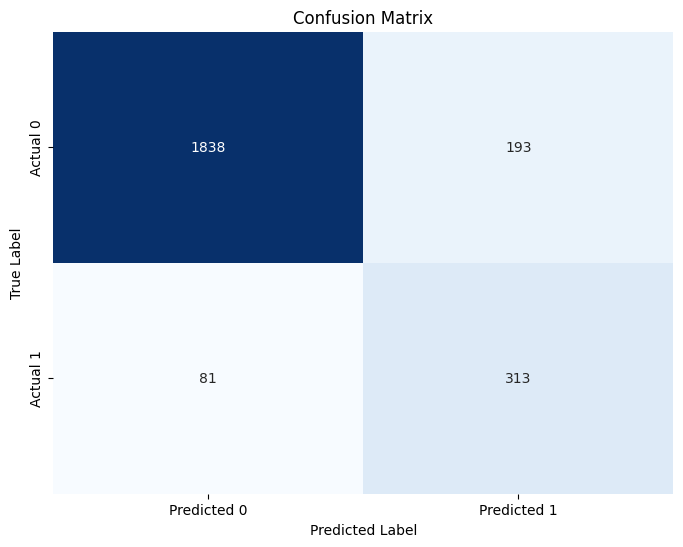

In [85]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred3)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred3)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# K-NN Model

In [87]:
# Using the original dataset to fit the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
# Saving the model
knn1_path = os.path.join(models_folder, 'knn_model1.pkl')
with open(knn1_path, 'wb') as file:
    pickle.dump(knn_model1, file)

In [89]:
# Loading the model
with open(knn1_path, 'rb') as file:
    loaded_knn1 = pickle.load(file)

In [90]:
y_pred_knn1 = loaded_knn1.predict(X_test)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      2031
         1.0       0.49      0.28      0.35       394

    accuracy                           0.84      2425
   macro avg       0.68      0.61      0.63      2425
weighted avg       0.81      0.84      0.82      2425

Kappa score: 0.269


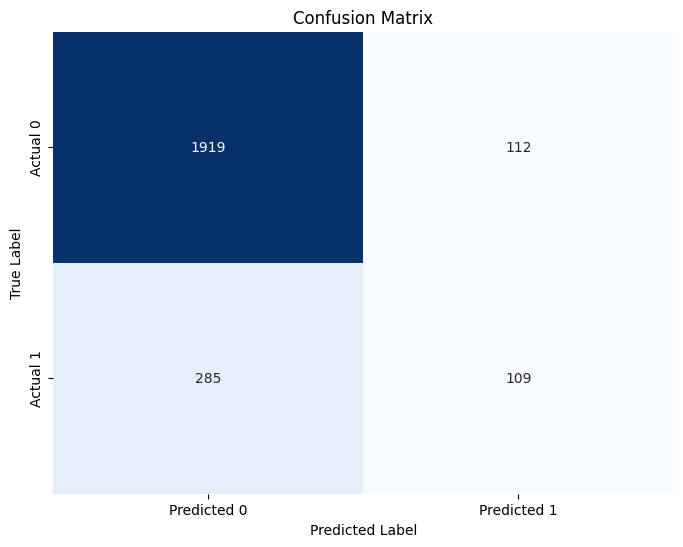

In [93]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn1)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn1)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn1)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [94]:
# Using the resampled dataset
knn_model2= KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [95]:
# Saving the model
knn2_path = os.path.join(models_folder, 'knn_model2.pkl')
with open(knn2_path, 'wb') as file:
    pickle.dump(knn_model2, file)

In [96]:
# Loading the model
with open(knn2_path, 'rb') as file:
    loaded_knn2 = pickle.load(file)

In [97]:
y_pred_knn2 = loaded_knn2.predict(X_test)

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2031
         1.0       0.34      0.56      0.42       394

    accuracy                           0.75      2425
   macro avg       0.62      0.67      0.63      2425
weighted avg       0.81      0.75      0.77      2425

Kappa score: 0.276


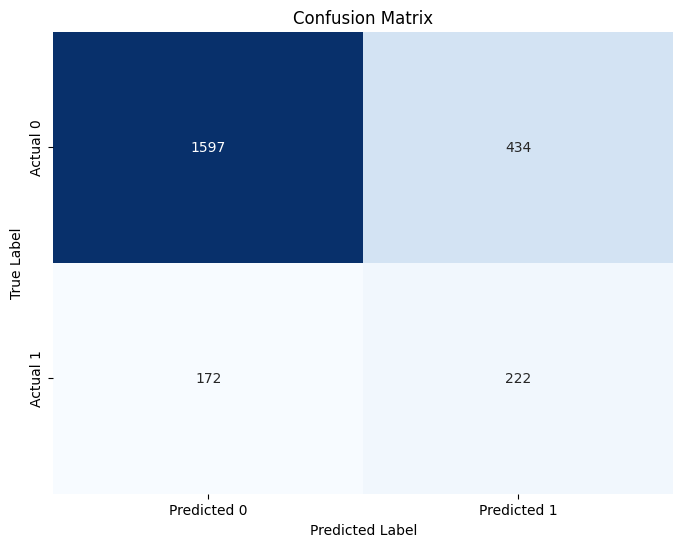

In [98]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn2)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn2)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn2)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# KNN with Gridsearch

In [100]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 20]}
knn2 = KNeighborsClassifier()
grid_search3 = GridSearchCV(knn2, param_grid, cv=5, scoring='accuracy', verbose=20)
grid_search3.fit(X_train_resampled, y_train_resampled)
best_n_neighbors = grid_search3.best_params_['n_neighbors']

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START n_neighbors=1...............................................
[CV 1/5; 1/7] END ................n_neighbors=1;, score=0.899 total time=   0.2s
[CV 2/5; 1/7] START n_neighbors=1...............................................
[CV 2/5; 1/7] END ................n_neighbors=1;, score=0.908 total time=   0.3s
[CV 3/5; 1/7] START n_neighbors=1...............................................
[CV 3/5; 1/7] END ................n_neighbors=1;, score=0.909 total time=   0.2s
[CV 4/5; 1/7] START n_neighbors=1...............................................
[CV 4/5; 1/7] END ................n_neighbors=1;, score=0.913 total time=   0.2s
[CV 5/5; 1/7] START n_neighbors=1...............................................
[CV 5/5; 1/7] END ................n_neighbors=1;, score=0.908 total time=   0.2s
[CV 1/5; 2/7] START n_neighbors=3...............................................
[CV 1/5; 2/7] END ................n_neighbors=3;,

In [101]:
best_n_neighbors

1

In [102]:
knn3 = KNeighborsClassifier()
grid_search4 = GridSearchCV(knn2, param_grid, cv=5, scoring='precision', verbose=20)
grid_search4.fit(X_train_resampled, y_train_resampled)
best_n_neighbors2 = grid_search4.best_params_['n_neighbors']
best_n_neighbors2

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START n_neighbors=1...............................................
[CV 1/5; 1/7] END ................n_neighbors=1;, score=0.843 total time=   0.3s
[CV 2/5; 1/7] START n_neighbors=1...............................................
[CV 2/5; 1/7] END ................n_neighbors=1;, score=0.854 total time=   0.3s
[CV 3/5; 1/7] START n_neighbors=1...............................................
[CV 3/5; 1/7] END ................n_neighbors=1;, score=0.855 total time=   0.3s
[CV 4/5; 1/7] START n_neighbors=1...............................................
[CV 4/5; 1/7] END ................n_neighbors=1;, score=0.860 total time=   0.3s
[CV 5/5; 1/7] START n_neighbors=1...............................................
[CV 5/5; 1/7] END ................n_neighbors=1;, score=0.852 total time=   0.3s
[CV 1/5; 2/7] START n_neighbors=3...............................................
[CV 1/5; 2/7] END ................n_neighbors=3;,

1

In [103]:
# Using the resampled dataset
knn_model_grid= KNeighborsClassifier(n_neighbors=1)
knn_model_grid.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

In [104]:
y_pred_knn3 = knn_model_grid.predict(X_test)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      2031
         1.0       0.37      0.44      0.40       394

    accuracy                           0.79      2425
   macro avg       0.63      0.65      0.64      2425
weighted avg       0.80      0.79      0.80      2425

Kappa score: 0.277


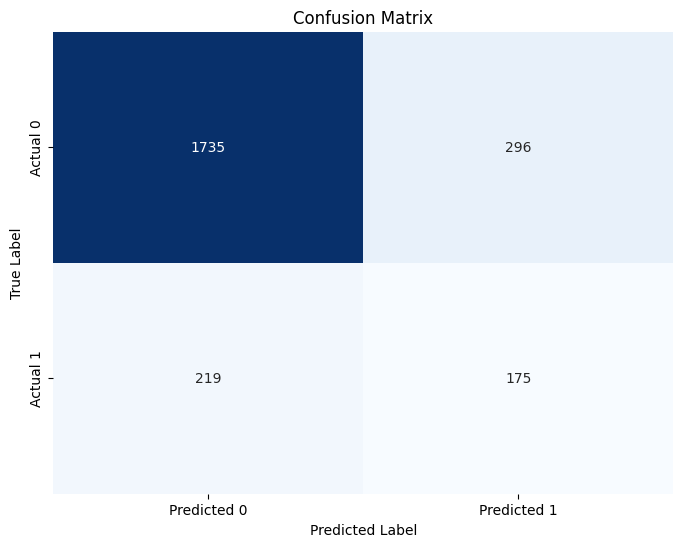

In [105]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn3)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn3)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn3)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

After trying logistic regression, random forest, and K-NN, I concluded that:
Random forest is performing significantly better 

In [106]:
# Saving the model
knn3_path = os.path.join(models_folder, 'knn_with_gridsearch.pkl')
with open(knn3_path, 'wb') as file:
    pickle.dump(knn_model_grid, file)

# Gradient Booster